# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):



\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}


\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

Liczba dostępów do pamięci jest 4 razy większa w interpolacji dwusześciennej. Ta sama zależność dotyczy liczby operacji arytmetycznych.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

import ainvert

In [2]:
def img_pix(img,x,y):
    size = img.shape
    if x < 0:
        nx = 0
    else:
        nx = min(size[0]-1,x)
    if y < 0:
        ny = 0
    else:
        ny = min(size[1]-1,y)
    return img[nx][ny]
    
def Lx(img,x,y):
    return (img_pix(img,x+1,y)-img_pix(img,x-1,y))/2

def Ly(img,x,y):
    return (img_pix(img,x,y+1)-img_pix(img,x,y+1))/2
        
def Lxy(img,x,y):
    return (img_pix(img,x+1,y+1)-img_pix(img,x-1,y)-img_pix(img,x,y-1)+img_pix(img,x,y))/4


def cubic_interpolation(img,scale_x,scale_y):
    old_x,old_y = img.shape
    x = int(old_x*scale_x)
    y = int(old_y*scale_y)
    img = img.astype(np.int32)
    new_img = np.zeros((x,y),dtype=np.int32)
    for i in range(x):
        for j in range(y):
            A = (int(i/scale_x),int(j/scale_y))
            B = (min(A[0]+1,old_x-1),A[1])
            C = (min(A[0]+1,old_x-1),min(A[1]+1,old_y-1))
            D = (A[0],min(A[1]+1,old_y-1))
            part_x = i/scale_x - A[0]
            part_y = j/scale_y - A[1]
            x_array = np.array(
                [img[A[0], A[1]], img[B[0], B[1]], img[D[0], D[1]], img[C[0], C[1]],
                 Lx(img,A[0], A[1]),  Lx(img,B[0], B[1]),  Lx(img,D[0], D[1]),  Lx(img,C[0], C[1]),
                 Ly(img,A[0], A[1]),  Ly(img,B[0], B[1]),  Ly(img,D[0], D[1]),  Ly(img,C[0], C[1]),
                 Lxy(img,A[0], A[1]), Lxy(img,B[0], B[1]), Lxy(img,D[0], D[1]), Lxy(img,C[0], C[1])], dtype=np.float64)
            ass = ainvert.A_invert @ x_array # Paweł rzuciłby jakimś żartem na temat Turinga pewnie, w tym momencie, hehe 
            new_val = 0
            for ys in range(4):
                for xs in range(4):
                    new_val += ass[ys*4+xs]*(part_x**xs)*(part_y**ys)
            new_img[i][j] = new_val
    return new_img

In [3]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileNames = ["parrot.bmp", "clock.bmp"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

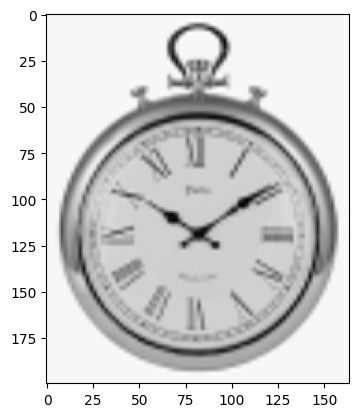

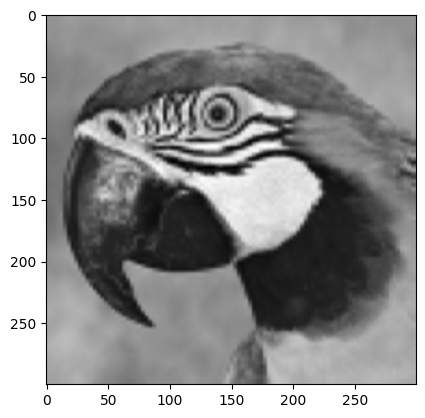

In [4]:
clock = cv2.imread('clock.bmp')           # Read image
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY) # Convert to RGB
new_img = cubic_interpolation(clock,2,2)
plt.imshow(new_img, cmap ="gray")
plt.show()
chess = cv2.imread('parrot.bmp')           # Read image
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY) # Convert to RGB
new_img = cubic_interpolation(chess,3,3)
plt.imshow(new_img, cmap ="gray")
plt.show()